# Домашнее задание 
Анализ данных
# Light

Для выполнения этого задания используйте базу hh_parsed_new.csv.

1. Обратите внимание, что в базе помимо адекватных ответов есть различные выбросы следующего характера: возраст 0 или 120 лет, желаемая зарплата 1 рубль и т. д. Проанализируйте базу на такие выбросы и проведите исследования, схожие с ноутбуком занятия с учетом выбросов. Насколько масштабными окажутся изменения?


2. На занятии не рассматривалась статистика людей, которые могли не указать пол. Проанализируйте, какие поля наиболее часто встречаются у таких лиц, какая средняя зарплата и другие показатели?


3. Возьмите базу с занятия и посмотрите, сколько в среднем запрашивают разработчики Java, Python, C++.


In [ ]:
%matplotlib inline

import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
from tensorflow.keras import utils # Будем использовать эту библиотеку для 
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой

import re # Регулряные выражения для эффективной работы со строками

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

In [ ]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hh = pd.read_csv('/content/drive/MyDrive/hh_parsed_new.csv')
hh

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Образование и ВУЗ,Ищет работу на должность
0,М,44,27000.0,малый или за пределами России город,полная занятость,полный день,73,среднее специальное,Старший администратор
1,М,42,60000.0,малый или за пределами России город,"частичная занятость, полная занятость","гибкий график, полный день",230,высшее,Старший IT инженер
2,М,45,65000.0,малый или за пределами России город,полная занятость,"полный день, удаленная работа",237,высшее,"Системный администратор, Системный инженер"
3,М,44,70000.0,Москва,полная занятость,"гибкий график, полный день, удаленная работа",69,высшее,"Web-программист, Web-администратор, Web-мастер"
4,М,41,45000.0,малый или за пределами России город,"частичная занятость, полная занятость","полный день, сменный график",161,высшее,Старший системный администратор \ начальник от...
...,...,...,...,...,...,...,...,...,...
66940,М,24,50000.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",12,среднее образование,Программист Python
66941,М,28,120000.0,Москва,полная занятость,полный день,93,высшее,Руководитель отдела по работе с ключевыми клие...
66942,М,56,80000.0,Санкт-Петербург,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, удаленная работа",414,высшее,программист
66943,Ж,33,70000.0,Самара,полная занятость,полный день,110,высшее,Руководитель проектов


In [ ]:
hh.rename(columns={'Опыт (двойное нажатие для полной версии)': 'Опыт'}, 
             inplace=True) # Переименовываем столбец в "Опыт"
hh.head(10)

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт,Образование и ВУЗ,Ищет работу на должность
0,М,44,27000.0,малый или за пределами России город,полная занятость,полный день,73,среднее специальное,Старший администратор
1,М,42,60000.0,малый или за пределами России город,"частичная занятость, полная занятость","гибкий график, полный день",230,высшее,Старший IT инженер
2,М,45,65000.0,малый или за пределами России город,полная занятость,"полный день, удаленная работа",237,высшее,"Системный администратор, Системный инженер"
3,М,44,70000.0,Москва,полная занятость,"гибкий график, полный день, удаленная работа",69,высшее,"Web-программист, Web-администратор, Web-мастер"
4,М,41,45000.0,малый или за пределами России город,"частичная занятость, полная занятость","полный день, сменный график",161,высшее,Старший системный администратор \ начальник от...
5,М,36,50000.0,Казань,полная занятость,полный день,155,высшее,менеджер по продажам
6,Ж,32,17000.0,малый или за пределами России город,полная занятость,полный день,94,среднее специальное,Оператор
7,М,41,80000.0,Москва,полная занятость,полный день,200,высшее,Руководитель проектов
8,Ж,42,120000.0,Москва,полная занятость,полный день,173,высшее,Менеджер по работе с корпоративными клиентами
9,М,46,120000.0,малый или за пределами России город,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",256,высшее,"IT-инженер,инженер AV-систем"


In [ ]:
hh.groupby('ЗП')['ЗП'].count()  #.iloc[400:425]

ЗП
1.0           22
3.0            1
10.0           2
18.0           1
25.0           1
              ..
7800000.0      1
8000000.0      1
8500000.0      1
10000000.0     1
24700000.0     1
Name: ЗП, Length: 689, dtype: int64

In [ ]:
hh.groupby('Возраст')['Возраст'].count()  #.iloc[400:425]

Возраст
0      2322
15        3
16        9
17        7
18       25
       ... 
78        1
79        1
92        3
101       2
120       1
Name: Возраст, Length: 67, dtype: int64

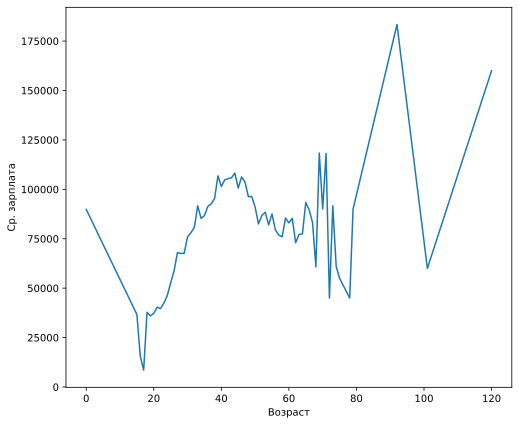

In [ ]:
# Средняя ЗП от возраста
hh.groupby('Возраст')['ЗП'].mean().plot()
plt.xlabel('Возраст')
plt.ylabel('Ср. зарплата')
plt.show()

In [ ]:
hh.groupby('Опыт')['Опыт'].count()  #.iloc[400:425]

Опыт
0       383
12      292
13      295
14      296
15      325
       ... 
622       1
653       2
663       1
1136      1
1188      2
Name: Опыт, Length: 515, dtype: int64

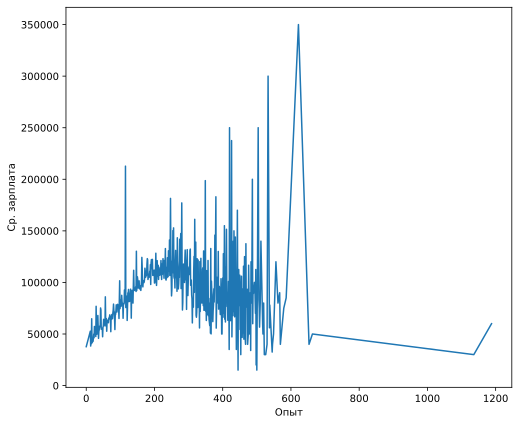

In [ ]:
# Средняя ЗП от возраста
hh.groupby('Опыт')['ЗП'].mean().plot()
plt.xlabel('Опыт')
plt.ylabel('Ср. зарплата')
plt.show()

In [ ]:
anonim = hh.loc[hh.Пол == 'Не указан']
anonim.head()

,Пол,Возраст,ЗП,Город,Занятость,График,Опыт,Образование и ВУЗ,Ищет работу на должность
41,Не указан,33,75000.0,малый или за пределами России город,"проектная работа, полная занятость","гибкий график, полный день, сменный график, уд...",113,высшее,Ведущий системный администратор \ Системный ад...
61,Не указан,37,4200.0,малый или за пределами России город,полная занятость,полный день,163,высшее,Senior Python Developer
81,Не указан,43,150000.0,малый или за пределами России город,полная занятость,полный день,222,высшее,"Менеджер проектов, аналитик, руководитель отде..."
103,Не указан,48,260000.0,малый или за пределами России город,полная занятость,полный день,257,высшее,CIO/CTO/IT director/Project Manager
114,Не указан,30,59500.0,малый или за пределами России город,"проектная работа, полная занятость","полный день, сменный график, удаленная работа",63,высшее,IT engineer


У 1766  из 67 000 позиций пол не указан. Данные примерно 2,6% кандидатов. Остальные данные указаны корректно.

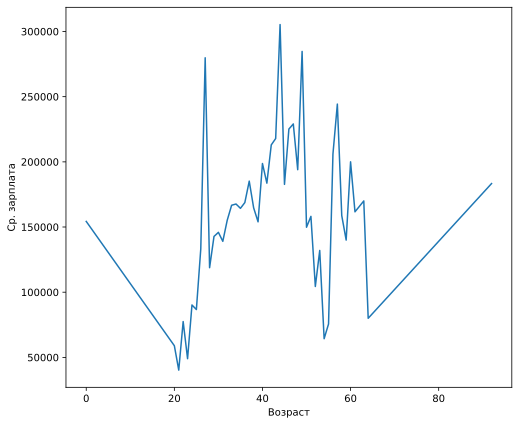

In [ ]:
# Средняя ЗП от возраста
anonim.groupby('Возраст')['ЗП'].mean().plot()
plt.xlabel('Возраст')
plt.ylabel('Ср. зарплата')
plt.show()

Много выбросов у кандидатов до 20 и старше 65 лет. В остальном диапазоне имеются некоторые выбросы или это данные возможно не самых адекватных кандидатов или не желающих вводить корректные данные, например, смотрящих работу интерфейса (по сути выбросы). По кандидатам старше 65  лет можно предположить, что есть пенсионеры, которым недостаточно пенсии, которые готовы работать дешевле, чтобы иметь прибавку благосостояния. Отсечкой основного диапазона является именно граница пенсионного возраста. Поэтому диапазон справа от 65 летможно рассматривать как небольшое количество кандидатов в категории "работники пенсионного возраста". Возможно эти данные окажутся также корректными.

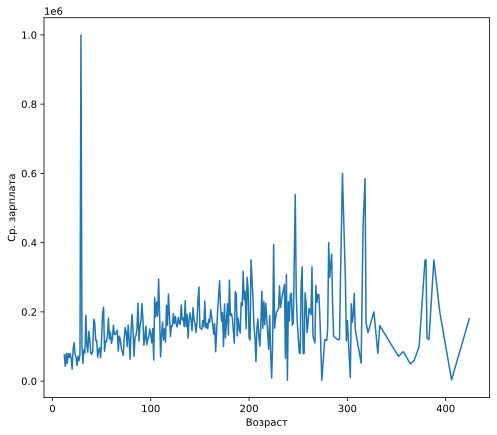

In [ ]:
# Средняя ЗП от возраста
anonim.groupby('Опыт')['ЗП'].mean().plot()
plt.xlabel('Возраст')
plt.ylabel('Ср. зарплата')
plt.show()

Существенные выбросы при маленьких и больших знаечниях опыта. Уже видна корелляция с предыдущим графиком, вороятно, зоны разброса яляются выбросами.

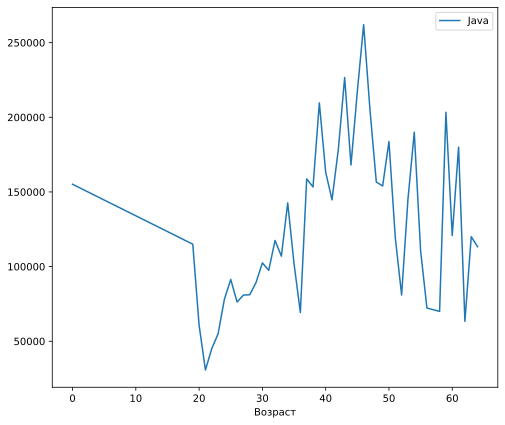

In [ ]:
hh[hh['Ищет работу на должность'].str.contains('Java|java')].groupby('Возраст')['ЗП'].mean().plot(label='Java')
plt.legend()
plt.show()

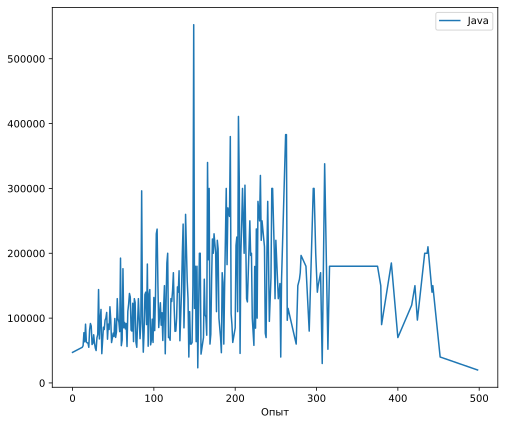

In [ ]:
hh[hh['Ищет работу на должность'].str.contains('Java|java')].groupby('Опыт')['ЗП'].mean().plot(label='Java')
plt.legend()
plt.show()

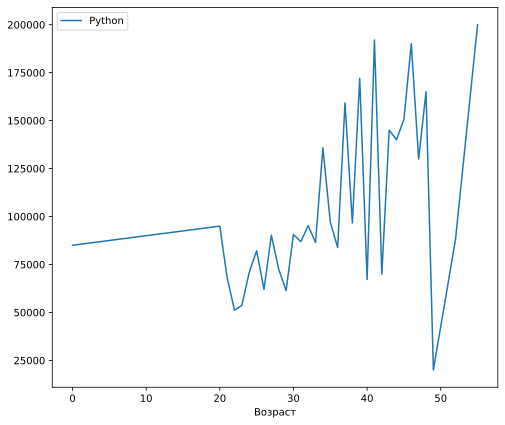

In [ ]:
hh[hh['Ищет работу на должность'].str.contains('Python|python')].groupby('Возраст')['ЗП'].mean().plot(label='Python')
plt.legend()
plt.show()


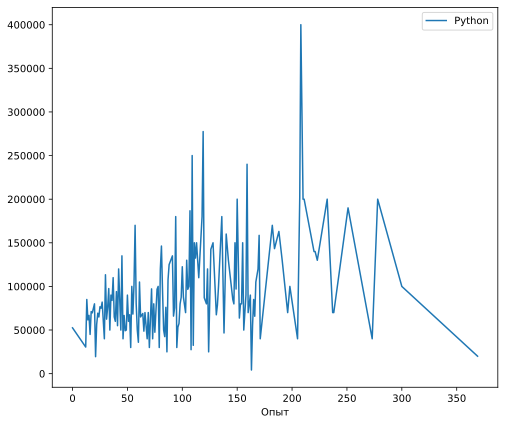

In [ ]:
hh[hh['Ищет работу на должность'].str.contains('Python|python')].groupby('Опыт')['ЗП'].mean().plot(label='Python')
plt.legend()
plt.show()

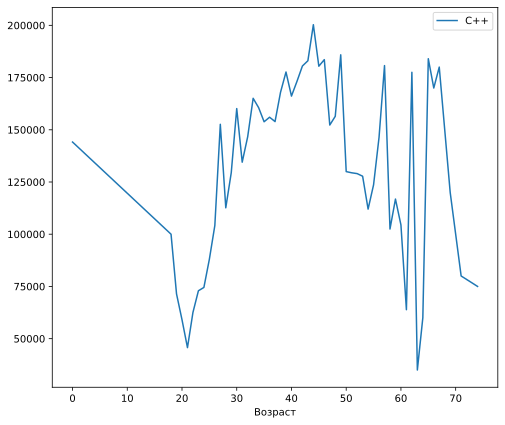

In [ ]:
hh[hh['Ищет работу на должность'].str.contains('C+|c+')].groupby('Возраст')['ЗП'].mean().plot(label='C++')
plt.legend()
plt.show()

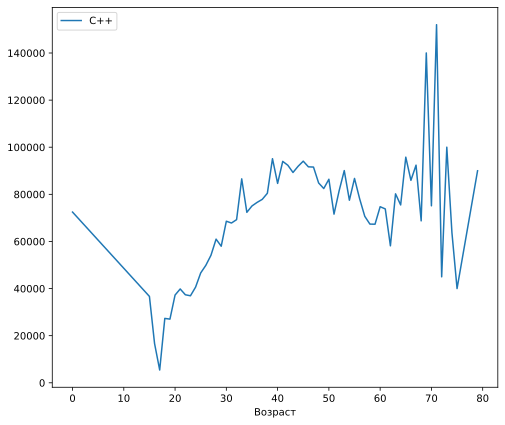

In [ ]:
hh[hh['Ищет работу на должность'].str.contains('С+|с+')].groupby('Возраст')['ЗП'].mean().plot(label='С++')
plt.legend()
plt.show()